In [154]:
import pandas as pd
data = pd.read_excel('Data Prediction Model.xlsx')
data.head()

,Unnamed: 0,event_datetime,attendance,Evening,WindSpeed,Precip,Snow,Friday_or_Saturday,Home_Stand,fame_opponent,Win_Stand
0,0,2022-10-23,244,1,11.0,0.000,0,0,0,1,1
1,1,2022-10-30,194,0,10.1,0.000,0,0,0,0,0
2,2,2022-10-31,91,1,8.2,0.000,0,0,0,1,0
3,3,2022-11-06,136,1,9.9,0.000,0,0,1,0,0
4,4,2022-11-07,179,1,10.0,1.879,0,0,1,1,0


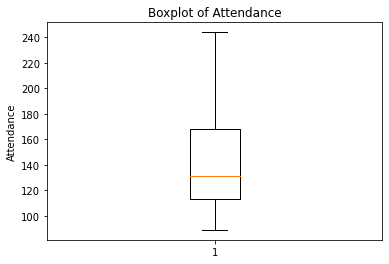

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# create a boxplot of attendance
fig, ax = plt.subplots()
ax.boxplot(data["attendance"])
ax.set_title("Boxplot of Attendance")
ax.set_ylabel("Attendance")
plt.show()

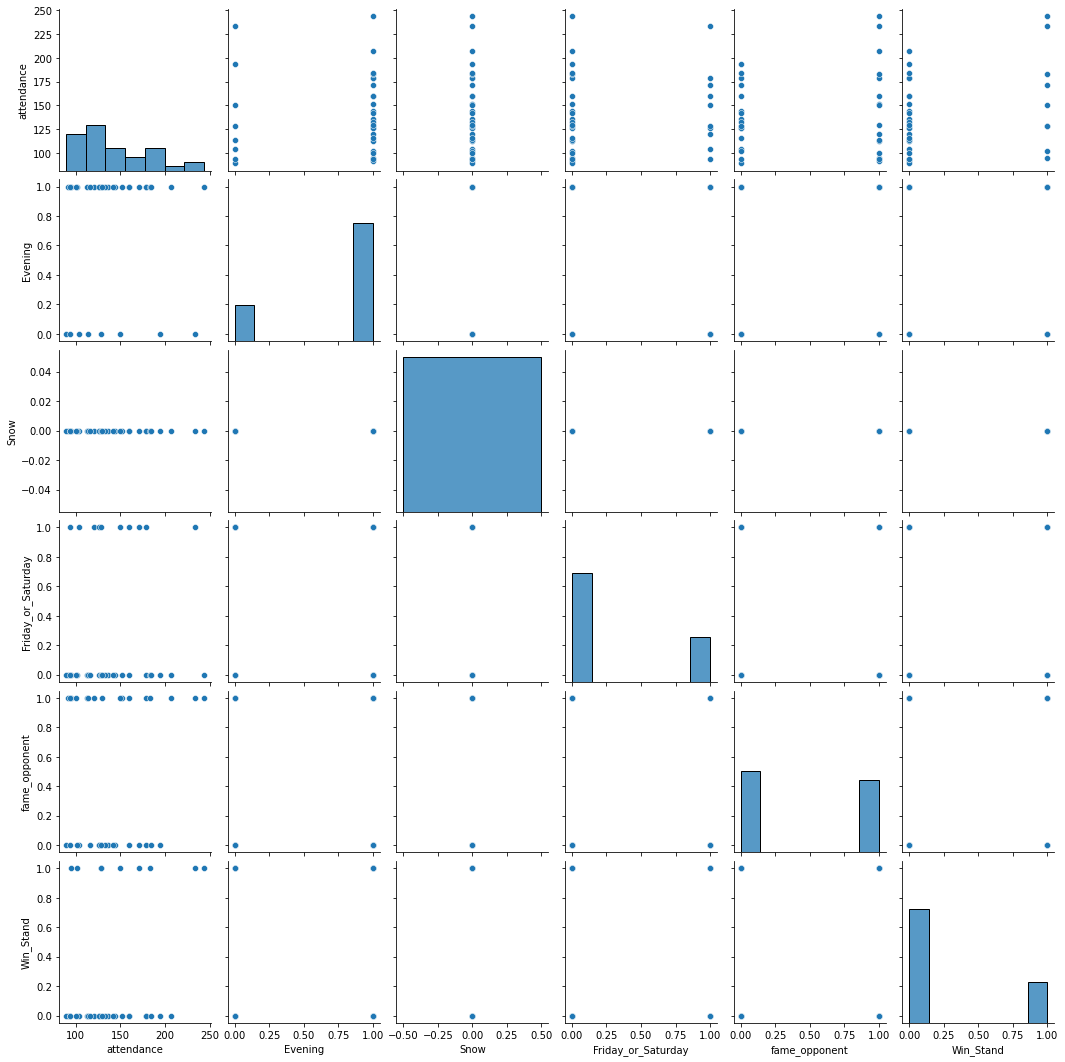

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

data = data.drop(['Unnamed: 0', 'event_datetime','WindSpeed', 'Precip', 'Home_Stand'], axis=1)
# assuming your data is stored in a variable named "data"
sns.pairplot(data)
plt.show()


In [101]:
import pandas as pd
import numpy as np

# calculate summary statistics
mean = np.mean(data["attendance"])
median = np.median(data["attendance"])
sd = np.std(data["attendance"])
variance = np.var(data["attendance"])
q1 = np.percentile(data["attendance"], 25)
q3 = np.percentile(data["attendance"], 75)
iqr = q3 - q1


# create a dataframe to store the summary statistics
stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Variation", "Interquartile Range", 'IQ1', 'IQ3'],
    "Value": [mean, median, sd, variance, iqr, q1, q3]
})

# display the summary statistics
print(stats_df)

             Statistic        Value
0                 Mean   141.794118
1               Median   131.000000
2   Standard Deviation    40.090177
3            Variation  1607.222318
4  Interquartile Range    55.000000
5                  IQ1   113.250000
6                  IQ3   168.250000


In [131]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = data[['Evening', 'WindSpeed', 'Precip', 'Snow', 'Friday_or_Saturday', 'Home_Stand', 'fame_opponent', 'Win_Stand']]
y = data['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error of Linear Regression:', rmse)

Root Mean Squared Error of Linear Regression: 38.20591815387728


In [127]:
#Gradient Boost
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Step 3: Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data.drop(['attendance', 'Unnamed: 0', 'event_datetime'], axis=1), 
                                                                    data['attendance'], test_size=0.2, random_state=42)

# Step 4: Define the features and target variables
features = train_data.columns.tolist()

# Step 5: Create a gradient boosting model and fit it to the training data
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(train_data, train_labels)

# Step 6: Evaluate the model using the testing data
predictions = model.predict(test_data)
mse = mean_squared_error(test_labels, predictions, squared = False)
print("Roost Mean Squared Error of Gradient Boost: {:.2f}".format(rmse))

Roost Mean Squared Error of Gradient Boost: 55.82


In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features to use in the model
X = data[['Evening', 'WindSpeed', 'Precip', 'Snow', 'Friday_or_Saturday', 'Home_Stand', 'fame_opponent', 'Win_Stand']]
y = data['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error of decision tree:', rmse)

Root Mean Squared Error of decision tree: 55.45497243939418


In [17]:
import pandas as pd
data = pd.read_excel('Data for Prediction Model.xlsx')
data.head()

,Unnamed: 0,event_datetime,attendance,Evening,WindSpeed,Precip,Snow,Friday_or_Saturday,Home_Stand,fame_opponent
0,0,2022-10-23,244,1,11.0,0.000,0,0,0,1
1,1,2022-10-30,194,0,10.1,0.000,0,0,0,0
2,2,2022-10-31,91,1,8.2,0.000,0,0,0,1
3,3,2022-11-06,136,1,9.9,0.000,0,0,1,0
4,4,2022-11-07,179,1,10.0,1.879,0,0,1,1


In [113]:
import pandas as pd
import statsmodels.formula.api as smf

# fit a linear regression model
model = smf.ols("attendance ~ Evening + WindSpeed + Precip + Snow + Friday_or_Saturday + Home_Stand + fame_opponent + Win_Stand", data=data).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.4237
Date:                Mon, 24 Apr 2023   Prob (F-statistic):              0.879
Time:                        03:57:51   Log-Likelihood:                -171.91
No. Observations:                  34   AIC:                             359.8
Df Residuals:                      26   BIC:                             372.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            126.7226     27

In [133]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['attendance', 'Unnamed: 0', 'event_datetime'], axis=1), data["attendance"], test_size=0.2, random_state=42)

# Create Random Forest model with default hyperparameters
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate mean squared error on the testing data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Root Mean Squared Error of Random Forest:", rmse)

Root Mean Squared Error of Random Forest: 47.51175388409543


In [156]:
#use bootstrap:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is in a pandas dataframe called 'df'
X = data.drop(['attendance', 'event_datetime', 'WindSpeed', 'Precip', 'Home_Stand'], axis=1) # Assuming 'attendance' is the target variable
y = data['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate a random forest classifier/regressor
rf = RandomForestClassifier(n_estimators=100, bootstrap=True) # For classification
rf = RandomForestRegressor(n_estimators=100, bootstrap=True) # For regression

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test, y_test) # For classification
r2_score = rf.score(X_test, y_test) # For regression
print('accuracy:', accuracy)
print('r2:', r2_score)

accuracy: -0.9606669722297112
r2: -0.9606669722297112


In [157]:
#use bootstrap:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is in a pandas dataframe called 'df'
X = data.drop(['attendance', 'event_datetime', 'WindSpeed', 'Snow', 'Home_Stand', 'Precip'], axis=1) # Assuming 'attendance' is the target variable
y = data['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
# Instantiate a random forest classifier/regressor
rf = RandomForestClassifier(n_estimators=100, bootstrap=True) # For classification
rf = RandomForestRegressor(n_estimators=100, bootstrap=True) # For regression

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test, y_test) # For classification
r2_score = rf.score(X_test, y_test) # For regression
print('accuracy:', accuracy)
print('r2:', r2_score)

accuracy: -0.07838732938962956
r2: -0.07838732938962956


In [161]:
#ridge regression of original data not using cv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['attendance', 'Unnamed: 0', 'event_datetime'], axis=1), data["attendance"], test_size=0.2, random_state=42)

# set the value of alpha
alpha = 100

# fit the model using Ridge regression with the specified alpha
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# make predictions on the testing set and evaluate the performance
y_pred = ridge.predict(X_test)
print("RMSE on testing set ridge regression: ", mean_squared_error(y_test, y_pred, squared=False))

RMSE on testing set ridge regression:  37.22734602888853


In [165]:
#ridge regression of original data using cv
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['attendance', 'Unnamed: 0', 'event_datetime'], axis=1), data["attendance"], test_size=0.2, random_state=42)

# define the range of alpha values to test
alpha_range = [10, 100, 150, 200]

# create a grid of parameter values to test using cross-validation
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(Ridge(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# print the best parameters and their score
print("Best parameters: ", grid.best_params_)
print("Best score: ", -grid.best_score_)

# fit the model using the best parameters and evaluate its performance on the testing set
ridge = Ridge(alpha=grid.best_params_['alpha'])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("RMSE on testing set: ", mean_squared_error(y_test, y_pred, squared=False))

Best parameters:  {'alpha': 200}
Best score:  1935.927325779098
RMSE on testing set:  37.102264825601786


In [169]:
import pandas as pd

# create a new pandas DataFrame with a single row of manually entered feature values
new_data = pd.DataFrame({
    'Evening': [1],
    'WindSpeed': [17.1],
    'Precip': [0],
    'Snow': [0],
    'Friday_or_Saturday': [1],
    'Home_Stand': [0],
    'fame_opponent': [1],
    'Win_Stand': [0]
})

# pass the preprocessed new data to the trained Ridge model to obtain the predicted value
y_pred_new = ridge.predict(new_data)
print("Predicted value for new data: ", y_pred_new[0]) # assuming that y_pred_new is a 1D numpy array

Predicted value for new data:  [141.65751324]


In [164]:
#use both bootstrap and cv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['attendance', 'Unnamed: 0', 'event_datetime'], axis=1), data["attendance"], test_size=0.2, random_state=42)

# set the value of alpha
alpha = 100

# set the number of bootstrap samples to generate
num_boot_samples = 1000

# initialize an array to hold the bootstrapped RMSEs
rmse_vals = np.zeros(num_boot_samples)

# fit the model using Ridge regression with the specified alpha for each bootstrap sample
for i in range(num_boot_samples):
    # randomly sample the training data with replacement
    sample_indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_train_boot = X_train.iloc[sample_indices]
    y_train_boot = y_train.iloc[sample_indices]

    # fit the model on the bootstrapped data
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_boot, y_train_boot)

    # make predictions on the testing set
    y_pred = ridge.predict(X_test)

    # calculate the RMSE and store it in the array
    rmse_vals[i] = mean_squared_error(y_test, y_pred, squared=False)

# calculate the mean and standard deviation of the bootstrapped RMSEs
rmse_mean = np.mean(rmse_vals)

# print the mean and standard deviation of the bootstrapped RMSEs
print("RMSE on testing set using bootstrap: ", rmse_mean)

RMSE on testing set using bootstrap:  42.8083398029424


In [159]:
import numpy as np
from sklearn.utils import resample

# set the number of bootstrap iterations
n_bootstrap = 100

# initialize arrays to store model coefficients and RMSE values
coef_values = np.zeros((n_bootstrap, len(X_train.columns)))
rmse_values = np.zeros(n_bootstrap)

# loop over bootstrap iterations
for i in range(n_bootstrap):
    # create a new bootstrap sample from the training data
    X_boot, y_boot = resample(X_train, y_train, random_state=i)
    
    # fit the ridge regression model to the bootstrap sample
    ridge_boot = Ridge(alpha=grid.best_params_['alpha'])
    ridge_boot.fit(X_boot, y_boot)
    
    # store the model coefficients
    coef_values[i, :] = ridge_boot.coef_
    
    # make predictions on the test set and compute RMSE
    y_pred = ridge_boot.predict(X_test)
    rmse_values[i] = mean_squared_error(y_test, y_pred, squared=False)

# compute the mean and standard deviation of the model coefficients and RMSE values
coef_mean = np.mean(coef_values, axis=0)
coef_std = np.std(coef_values, axis=0)
rmse_mean = np.mean(rmse_values)
rmse_std = np.std(rmse_values)

# print the results
print("Bootstrap results:")
print("Mean coefficients: ", coef_mean)
print("Coefficient standard deviations: ", coef_std)
print("Mean RMSE: ", rmse_mean)
print("RMSE standard deviation: ", rmse_std)

Bootstrap results:
Mean coefficients:  [-1.07277157 -0.10343244  0.24751537  0.61532656  0.66362079]
Coefficient standard deviations:  [0.70448318 0.46680567 0.42809834 0.45499747 0.5316416 ]
Mean RMSE:  37.49464497455398
RMSE standard deviation:  2.1437196335826245


In [136]:
#normal linear regression without not-useful variables:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = data[['Snow', 'Friday_or_Saturday', 'fame_opponent', 'Win_Stand']]
y = data['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error of Linear Regression:', rmse)

Root Mean Squared Error of Linear Regression: 36.35616203539649


In [137]:
#Do boosting on the linear regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingRegressor object
gb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_reg.predict(X_test)

# Calculate the mean squared error on the test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Root MSE: ", rmse)

Root MSE:  38.391233983714805


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingRegressor object
gb_reg = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'learning_rate': [0.001, 0.009, 0.01],
              'n_estimators': [60, 65],
              'max_depth': [0.5, 0.9, 1, 1.5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the mean squared error on the test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("RMSE: ", rmse)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 65}
RMSE:  34.92689774812976


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 668, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 745, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.9/site